In [2]:
# !pip install opencv-python
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [3]:
def get_mask(path):
    img = cv2.imread(path)
    mask = np.zeros((img.shape[0], img.shape[1]), dtype='uint8')
    for x in range (img.shape[0]):
        for y in range (img.shape[1]):
            if img[x][y][0] == 0:
                mask[x][y] = 1
    return mask

In [4]:
def show(img):
    plt.imshow(img)
    plt.show()

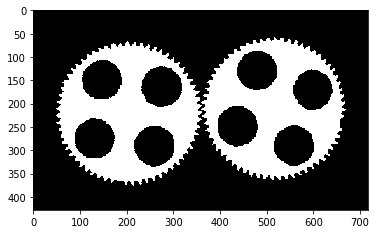

In [134]:
img = cv2.imread("image.png")
ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

show(img)

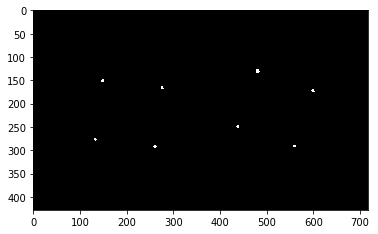

In [135]:
hole_ring = get_mask('hole_ring.png')
# show_img(hole_ring)
b1 = cv2.erode(img, hole_ring)
show(b1)

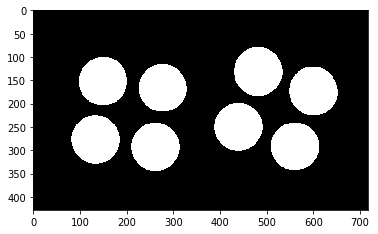

In [136]:
hole_mask = get_mask('hole_mask.png')
b2 = cv2.dilate(b1, hole_mask)
show(b2)

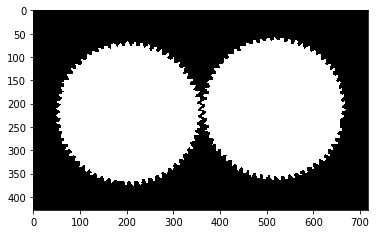

In [137]:
b3 = cv2.add(img, b2)
show(b3)

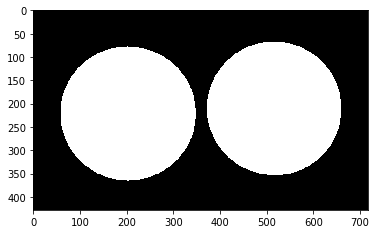

In [153]:
gear_body = get_mask('gear_body.png')
b4 = cv2.morphologyEx(b3, cv2.MORPH_OPEN, gear_body)
show(b4)

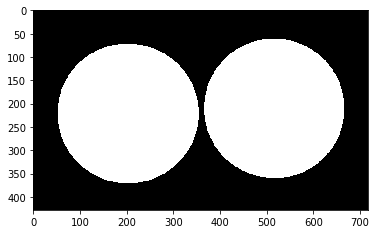

In [154]:
sampling_ring_spacer = get_mask('sampling_ring_spacer.png')
b5 = cv2.dilate(b4, sampling_ring_spacer)
show(b5)

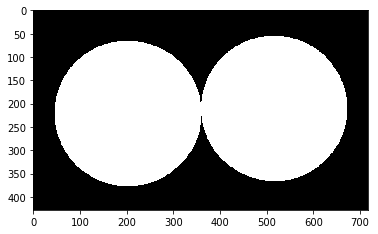

In [155]:
b6 = cv2.dilate(b5, sampling_ring_spacer)
show(b6)

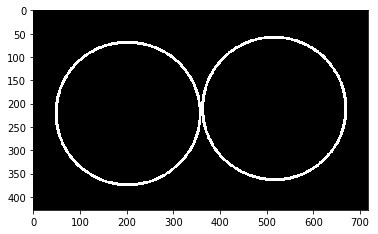

In [156]:
b7 = cv2.subtract(b6, b5)
show(b7)

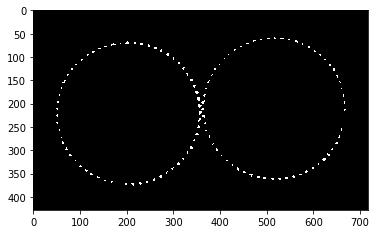

In [157]:
b8 = cv2.bitwise_and(b7, img)
show(b8)

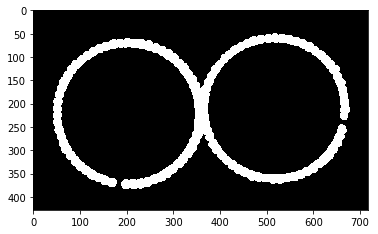

In [158]:
tip_spacing = get_mask('tip_spacing.png')
b9 = cv2.dilate(b8, tip_spacing)
show(b9)

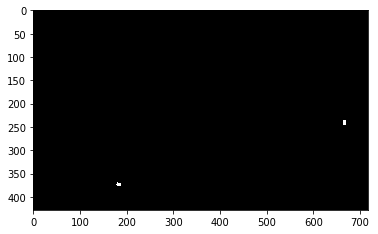

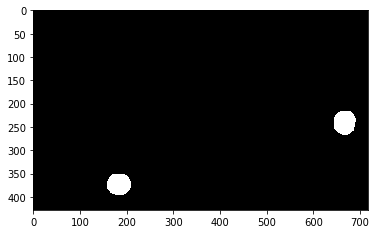

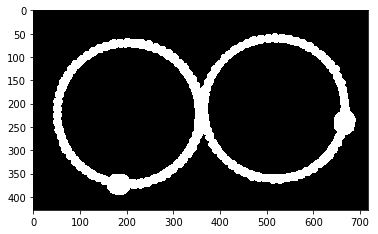

In [161]:
defect_cue = get_mask('defect_cue.png')
b10 = cv2.subtract(b7, b9)
show(b10)
b11 = cv2.dilate(b10, defect_cue)
show(b11)
b12 = cv2.bitwise_or(b11, b9)
show(b12)